In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from IPython.display import display, HTML
#%timeit ,  line_profiler, memory_profiler

## Definitions

In [2]:
def tcor(df):
    display(df.corr())
    fig, ax = plt.subplots(figsize=(6,5)) 
    v_cr = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
    
def thist(df):
    dat = df.select_dtypes(include=['float64','int64'])
    side = math.ceil(math.sqrt(dat.shape[1]))
    fig, frame = plt.subplots(side, side,figsize=(12,8))
    fig.tight_layout()
    x = 0
    y = 0
    
    for i, ax in enumerate(fig.axes):
        try:
            col = dat.columns[i]
            ax.set_xlabel(col)
            ax.hist(dat[col])
        except IndexError:
            pass

    plt.show()
    dat.iplot(kind='box')
    
def load(namefile):
    return pd.read_csv('../../../datasets/'+namefile, index_col=False)

def get_div(alist, values):
    init = """
        <body>
        <style>
        .announce {
            color: #208ffb;
            font-weight: bold;
        }
        </style><div class="announce">NULLs in dataset:<br>---------------------<br>
        """
    inner = ""
    if type(alist)==list:
        for col, val in zip(alist, values):
            inner += col +": " + str(val) + "<br>"
    else:
        inner = alist
    closing = "</div></body>"
    html = init + inner + closing
    return html
        

def print_nulls(data):
    null_cols = data.isnull().sum()
    null_cols = null_cols[null_cols>0]
    drop_cols = list(null_cols[null_cols > 0].index)
    val_cols = [null_cols[col] for col in drop_cols]
    if len(drop_cols)==0:
        display(HTML(get_div('<br>This dataset has no nulls<br><br>','')))
    else:
        display(HTML(get_div(drop_cols,val_cols)))


def summary(csv):
    df = load(csv)
    display(df.head(2))
    display(df.tail(2))
    print_nulls(df)
    display(df.info())
    tcor(df)
    return df
    

## taking a look

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82


,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
5697,Vane,PS4,Friend & Foe,Adventure,No Online Multiplayer,E10+,"Jan 15, 2019",3,26,22,2,2,2,49,55
5698,Left Alive,PS4,"Square Enix, ilinx inc.",Action Adventure,No Online Multiplayer,M,"Mar 5, 2019",1,7,27,25,8,21,37,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 15 columns):
game                5699 non-null object
platform            5699 non-null object
developer           5685 non-null object
genre               5694 non-null object
number_players      3059 non-null object
rating              4433 non-null object
release_date        5699 non-null object
positive_critics    5699 non-null int64
neutral_critics     5699 non-null int64
negative_critics    5699 non-null int64
positive_users      5699 non-null int64
neutral_users       5699 non-null int64
negative_users      5699 non-null int64
metascore           5699 non-null int64
user_score          5699 non-null int64
dtypes: int64(8), object(7)
memory usage: 667.9+ KB


None

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
positive_critics,1.000000,0.025827,-0.208794,0.498124,0.408805,0.172460,0.550571,0.335046
neutral_critics,0.025827,1.000000,0.254702,0.012544,0.148627,0.102147,-0.319653,-0.153139
negative_critics,-0.208794,0.254702,1.000000,-0.029716,0.020774,0.073831,-0.660855,-0.397001
positive_users,0.498124,0.012544,-0.029716,1.000000,0.714788,0.424721,0.234064,0.131384
neutral_users,0.408805,0.148627,0.020774,0.714788,1.000000,0.649939,0.161325,-0.023144
negative_users,0.172460,0.102147,0.073831,0.424721,0.649939,1.000000,0.033951,-0.200107
metascore,0.550571,-0.319653,-0.660855,0.234064,0.161325,0.033951,1.000000,0.550555
user_score,0.335046,-0.153139,-0.397001,0.131384,-0.023144,-0.200107,0.550555,1.000000


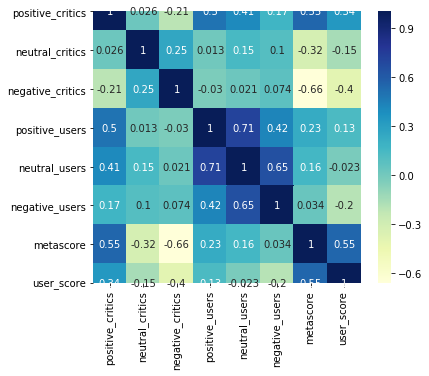

In [3]:
df = summary('metacritic_games.csv')

# Correlations:
####  neutral_users / positive_users : 0.71
####  negative_users / neutral_users : 0.65
####  score / positive_critics : 0.55
####  user_score / score : 0.55
####  score / negative_critics : -0.66

Not has strong correlations, and some looks weird, like relations amongst users.

The more related seems to be score / negative_critics.

## graphs

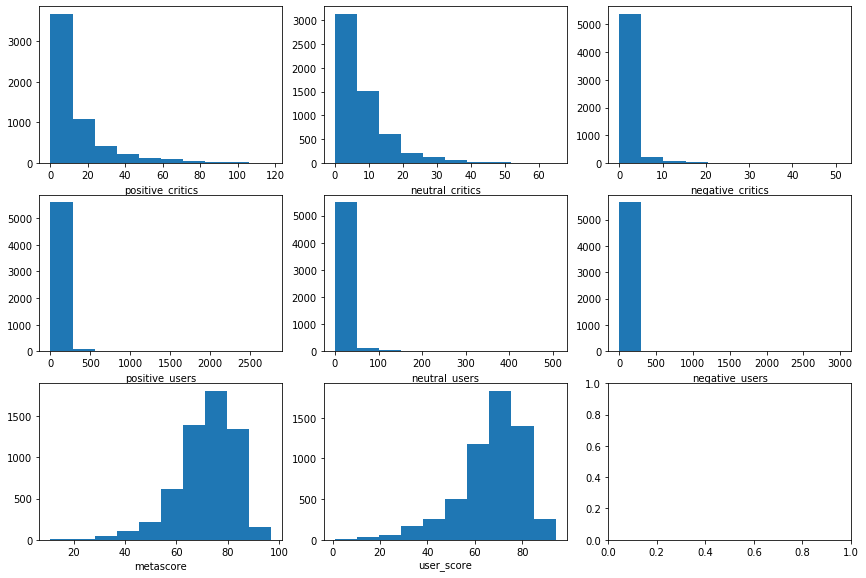

In [4]:
thist(df)

# Counting Null values

In [5]:
null_cols = df.isnull().sum()
null_cols[null_cols>0]

developer           14
genre                5
number_players    2640
rating            1266
dtype: int64

# Denulling some columns

In [6]:
# Obtaining null genre name games list (5)
nl_genre = list(df[df['genre'].isna()]['game'])

# Manually we write correct values
rb_genre = ['Adventure','Shooter',"Beat-'Em-Up",'Adventure','Action Adventure']


def denull(df, col_by, col_at, list_nullby, list_val):
    """ It denulls genre by name game per example """
    if df is not None and col_by and col_at and list_nullby and list_val:
        for (null_by, ok_val) in zip(list_nullby, list_val):
            df.loc[df[col_by] == null_by, col_at] = ok_val
    return df

# Dataframe denulled genre column
df = denull(df, 'game', 'genre', nl_genre, rb_genre)

# Obtaining null developer items list (14)
nl_dev = list(df[df['developer'].isna()]['game'])

# Manually we write correct values
rb_dev = ['EA UK','Burut CT',"Michaela Laws",'Out Of The Park Developments',
          'Red Barrels','Sony Interactive Entertainment','Centauri Production',
          'Capcom Vancouver','Bungie','Sega','Sledgehammer Games','Nude Maker',
          'Beep Games','WWO Partners']

# Dataframe denulled developer column
df = denull(df, 'game', 'developer', nl_dev, rb_dev)

# Now just number_players and rating had null values
null_cols = df.isnull().sum()
null_cols[null_cols > 0]


number_players    2640
rating            1266
dtype: int64

# Re-Grouping 'number_players' and mark as Unknown

In [7]:
types = list(df['number_players'].unique())
types


[nan,
 'No Online Multiplayer',
 '1 Player',
 'Online Multiplayer',
 '2 ',
 'Up to 8 ',
 'Massively Multiplayer',
 '4  Online',
 '1-2 ',
 '2  Online',
 'Up to 4 ',
 '1-8 ',
 '16  Online',
 '3  Online',
 '64+  Online',
 '6  Online',
 'Up to 40 ',
 '1-4 ',
 'Up to 6 ',
 'Up to 10 ',
 '1-5 ',
 'Up to 64 ',
 '8  Online',
 'Up to 22 ',
 'Up to 3 ',
 'Up to 16 ',
 'Up to 18 ',
 'Up to 24 ',
 'Up to 30 ',
 'Up to 12 ',
 'Up to 32 ',
 'Up to 5 ',
 'Up to 20 ',
 'Up to more than 64 ',
 'Up to 9 ',
 'Up to 60 ']

In [8]:
# Many values can be reagruped as Online
types = list(df['number_players'].unique())
types

# avoiding 1 player and Multiplayer categories
depurable = [ty for ty in types if type(ty)==str and (not 'Multiplayer' in ty and not '1 Player' in ty)]
depurable[:5]

final_types = {'2':'2 Players', '-':'Variable','Up to':'Online Multiplayer'
              ,'  Online':'Online Multiplayer'}

# depurating process
for ty in depurable:
    for key in final_types.keys():
        if ty == '2 ':
            df.loc[(df['number_players'].notna())&
                   (df['number_players'].str.strip()==key),'number_players'] = final_types[key]
        df.loc[(df['number_players'].notna())&
               (df['number_players'].str.contains(key)),'number_players'] = final_types[key]

# Marking nulls as UNKNOWN
df.loc[df['number_players'].isna(),'number_players'] = 'UNKNOWN'

[nan,
 'No Online Multiplayer',
 '1 Player',
 'Online Multiplayer',
 '2 ',
 'Up to 8 ',
 'Massively Multiplayer',
 '4  Online',
 '1-2 ',
 '2  Online',
 'Up to 4 ',
 '1-8 ',
 '16  Online',
 '3  Online',
 '64+  Online',
 '6  Online',
 'Up to 40 ',
 '1-4 ',
 'Up to 6 ',
 'Up to 10 ',
 '1-5 ',
 'Up to 64 ',
 '8  Online',
 'Up to 22 ',
 'Up to 3 ',
 'Up to 16 ',
 'Up to 18 ',
 'Up to 24 ',
 'Up to 30 ',
 'Up to 12 ',
 'Up to 32 ',
 'Up to 5 ',
 'Up to 20 ',
 'Up to more than 64 ',
 'Up to 9 ',
 'Up to 60 ']

['2 ', 'Up to 8 ', '4  Online', '1-2 ', '2  Online']

In [9]:
# final look of Dataframe by number_players
num = df.groupby(['number_players']).count()
num

,game,platform,developer,genre,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
number_players,,,,,,,,,,,,,,
1 Player,93,93,93,93,76,93,93,93,93,93,93,93,93,93
2 Players,263,263,263,263,253,263,263,263,263,263,263,263,263,263
Massively Multiplayer,19,19,19,19,18,19,19,19,19,19,19,19,19,19
No Online Multiplayer,1869,1869,1869,1869,1310,1869,1869,1869,1869,1869,1869,1869,1869,1869
Online Multiplayer,785,785,785,785,664,785,785,785,785,785,785,785,785,785
UNKNOWN,2640,2640,2640,2640,2083,2640,2640,2640,2640,2640,2640,2640,2640,2640
Variable,30,30,30,30,29,30,30,30,30,30,30,30,30,30


In [10]:
# Rating by age
df['rating'].unique()

# Marking nulls as UNKNOWN
df.loc[df['rating'].isna(),'rating'] = 'UNKNOWN'

# final look of Dataframe by rating
rt = df.groupby(['rating']).count()
rt

array(['E10+', 'M', 'T', 'E', nan, 'RP', 'AO'], dtype=object)

,game,platform,developer,genre,number_players,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
rating,,,,,,,,,,,,,,
AO,2,2,2,2,2,2,2,2,2,2,2,2,2,2
E,890,890,890,890,890,890,890,890,890,890,890,890,890,890
E10+,915,915,915,915,915,915,915,915,915,915,915,915,915,915
M,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
RP,19,19,19,19,19,19,19,19,19,19,19,19,19,19
T,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360
UNKNOWN,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266


In [11]:
df.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,UNKNOWN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,UNKNOWN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84


# Columns Info

In [12]:
df.columns

Index(['game', 'platform', 'developer', 'genre', 'number_players', 'rating',
       'release_date', 'positive_critics', 'neutral_critics',
       'negative_critics', 'positive_users', 'neutral_users', 'negative_users',
       'metascore', 'user_score'],
      dtype='object')

# Describe

In [13]:
# Numeric Fields Description: 
nf = df.describe().T
nf['IQR'] = nf['75%'] - nf['25%']
nf

,count,mean,std,min,25%,50%,75%,max,IQR
positive_critics,5699.0,13.351816,16.202234,0.0,3.0,8.0,17.0,118.0,14.0
neutral_critics,5699.0,7.959467,7.699535,0.0,3.0,6.0,10.0,65.0,7.0
negative_critics,5699.0,1.146341,2.926260,0.0,0.0,0.0,1.0,51.0,1.0
positive_users,5699.0,28.752062,103.688270,0.0,2.0,5.0,17.0,2762.0,15.0
neutral_users,5699.0,8.636603,24.706790,0.0,1.0,2.0,6.0,506.0,5.0
negative_users,5699.0,14.374627,84.938320,0.0,0.0,1.0,5.0,2998.0,5.0
metascore,5699.0,71.857694,11.214583,11.0,66.0,73.0,80.0,97.0,14.0
user_score,5699.0,67.138621,13.581873,1.0,61.0,70.0,76.0,94.0,15.0


BOXPLOTS and Outliers

In [14]:
import warnings
warnings.simplefilter("ignore")

dat = df.select_dtypes(include=['float64','int64'])

cols_no_users=['game', 'platform', 'developer', 'genre', 'number_players', 'rating',
       'release_date', 'positive_critics', 'neutral_critics',
       'negative_critics', 'metascore', 'user_score']
dat_n = dat.loc[:,cols_no_users]
dat_n.iplot(kind='box')

cols_users = ['positive_users', 'neutral_users', 'negative_users']
dat_u = dat.loc[:,cols_users]
dat_u.iplot(kind='box')

### Has presence of outliers at every numeric field

<function matplotlib.pyplot.show(*args, **kw)>

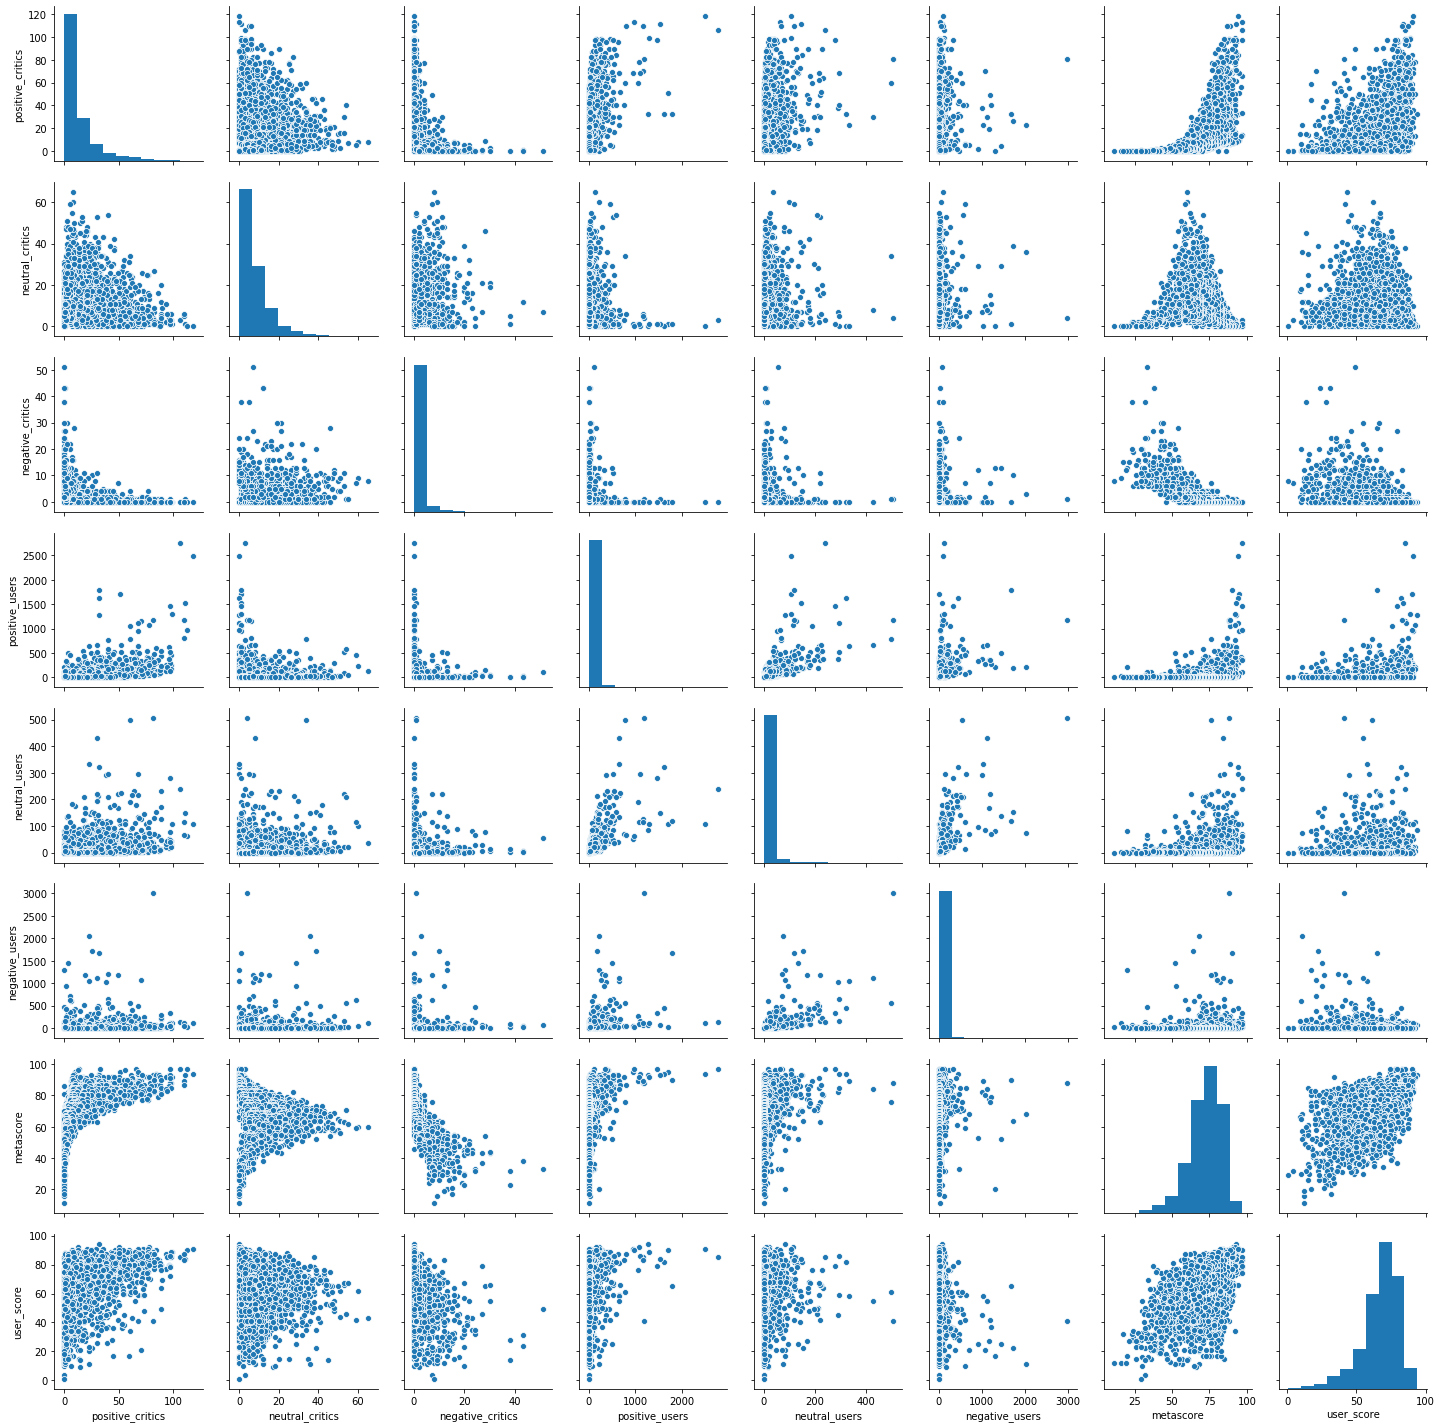

In [15]:
# scatterplots matriz a viam on hi ha possibles correlacions o regresions
sns.pairplot(dat)
plt.show

# Studiying Highlighted Variables

In [36]:
from scipy.stats import linregress

def info(serie, ret = False):
    iqr = serie.quantile(.75) - serie.quantile(.25)
    q1 = serie.quantile(.25)
    q2 = serie.quantile(.5)
    q3 = serie.quantile(.75)
    res = serie.name+"-> q1:"+str(q1)+", q2:"+str(q2)+", q3:"+str(q3)+", iqr:"+str(iqr)
    print(res)
    if ret:
        return (q1, q2, q3, iqr)
    return ""
    
def title(text, color="#208ffb", hr ="h4"):
    htm = "<body><div style='color:"+color+";'><"+hr+">"+text+"</"+hr+"></div></body>"
    display(HTML(htm))

In [34]:

# negative_users vs positive_users
def linres(serie1,serie2):
    slope, intercept, r_value, p_value, std_err = linregress(serie1,serie2)
    return slope, intercept, r_value, p_value, std_err

def datplot(dat, serie1, serie2):
    ax = sns.regplot(x=serie1.name, y=serie2.name, data=dat)
    plt.show()

def study(dat, serie1, serie2):
    slope, intercept, r_value, p_value, std_err = linres(serie1, serie2)
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    title(serie1.name + " vs "+serie2.name)
    info(serie1)
    info(serie2)
    print("Linear Regression:")
    print("Slope:"+str(slope)+", Intercept:"+str(intercept)+" p-value:"+str(p_value))
    print("Correlation:"+str(serie1.corr(serie2)))
    if p_value < 0.5:
        display(HTML("<h4>H0 rebuked</h4>"))
    else:
        display(HTML("<h4>H0 cannot rebuk</h4>"))
    datplot(dat, serie1, serie2)

def studiying(dat, alist, title_):
    title(title_, color="#066", hr="h3")
    for (s1, s2) in alist:
        study(dat, s1, s2)
    

In [26]:
# Correlations:
####  neutral_users / positive_users : 0.71
####  negative_users / neutral_users : 0.65
####  score / positive_critics : 0.55
####  user_score / score : 0.55
####  score / negative_critics : -0.66

corr_var = [
    (dat.negative_users, dat.neutral_users),
    (dat.metascore, dat.positive_critics),
    (dat.metascore, dat.negative_critics)
]

plot_var = [(dat.negative_users, dat.positive_users),
              (dat.neutral_users, dat.positive_users),
             (dat.user_score, dat.metascore)]

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


negative_users-> q1:0.0, q2:1.0, q3:5.0, iqr:5.0
positive_users-> q1:2.0, q2:5.0, q3:17.0, iqr:15.0
Linear Regression:
Slope:0.5184774193409427, Intercept:21.299142188133114 p-value:2.0362632099059677e-248
Correlation:0.4247211479412529


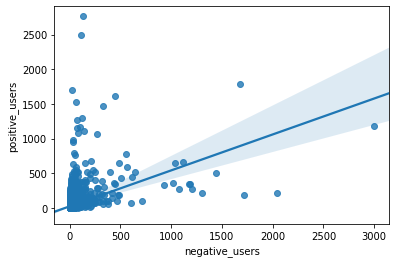

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


neutral_users-> q1:1.0, q2:2.0, q3:6.0, iqr:5.0
positive_users-> q1:2.0, q2:5.0, q3:17.0, iqr:15.0
Linear Regression:
Slope:2.9997858970046694, Intercept:2.844102149399923 p-value:0.0
Correlation:0.7147875132790386


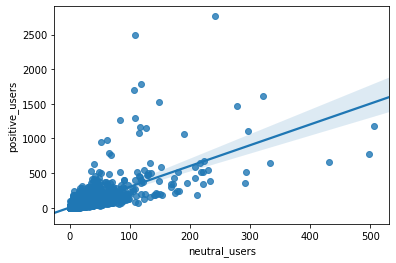

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


user_score-> q1:61.0, q2:70.0, q3:76.0, iqr:15.0
metascore-> q1:66.0, q2:73.0, q3:80.0, iqr:14.0
Linear Regression:
Slope:0.4545941646765443, Intercept:41.33686908737789 p-value:0.0
Correlation:0.5505546032810017


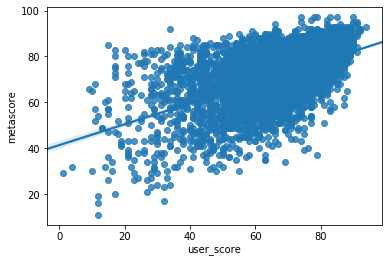

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


negative_users-> q1:0.0, q2:1.0, q3:5.0, iqr:5.0
neutral_users-> q1:1.0, q2:2.0, q3:6.0, iqr:5.0
Linear Regression:
Slope:0.189053599737703, Intercept:5.919027909438082 p-value:0.0
Correlation:0.6499385427639492


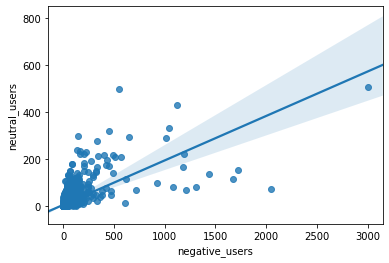

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


metascore-> q1:66.0, q2:73.0, q3:80.0, iqr:14.0
positive_critics-> q1:3.0, q2:8.0, q3:17.0, iqr:14.0
Linear Regression:
Slope:0.7954364222464402, Intercept:-43.8064111825049 p-value:0.0
Correlation:0.55057144616016


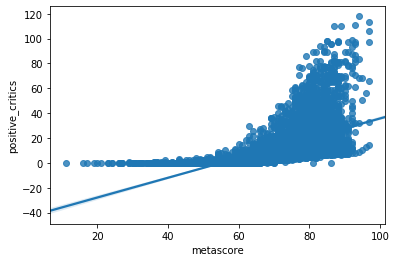

- - - - - - - - - - - - - - - - - - - - - - - - - - - -


metascore-> q1:66.0, q2:73.0, q3:80.0, iqr:14.0
negative_critics-> q1:0.0, q2:0.0, q3:1.0, iqr:1.0
Linear Regression:
Slope:-0.17243921151432443, Intercept:13.537425615320512 p-value:0.0
Correlation:-0.66085514180451


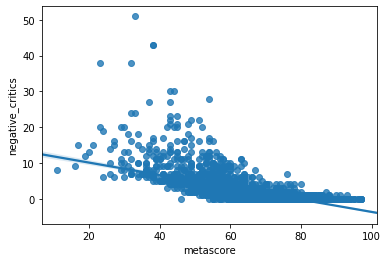

In [35]:
studiying(dat, plot_var, "Variables from plotting")
studiying(dat, corr_var, "Variables from correlation")

# Confidence intervals

In [20]:
import scipy.stats as stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def conf_int(serie, confidence=0.95):
    mean_, min_, max_ = mean_confidence_interval(serie)
    print(serie.name+": "+"("+str(min_)+","+str( max_)+")")

In [21]:
confidence_vars = [
    dat.negative_users, dat.neutral_users, dat.positive_users, dat.metascore,
    dat.user_score, dat.positive_critics, dat.negative_critics
]

for var in confidence_vars:
    conf_int(var)

negative_users: (12.168936013211674,16.580318241920807)
neutral_users: (7.995013258322428,9.278192567261009)
positive_users: (26.059469125610846,31.444654404833088)
metascore: (71.56647235913336,72.14891630554466)
user_score: (66.78592469095695,67.49131693038014)
positive_critics: (12.93107404806798,13.772558168110297)
negative_critics: (1.0703519094889362,1.222331017340332)


# Hypothesis Test

In [37]:
from scipy.stats import ttest_1samp
# t-test 1 sample
from scipy.stats import ttest_rel
# t-test relateds
from scipy.stats import ttest_ind
# t-test ind ependent

def sample1(serie1, value=0):
    return ttest_1samp(serie1, value)

def dep2(serie1, serie2, equal=True):
    return ttest_rel(dat.negative_users, dat.neutral_users, equal_var=equal)

def indep2(serie1, serie2, equal=True):
    return ttest_ind(dat.negative_users, dat.neutral_users, equal_var=equal)

def hyp_test(serie1, serie2=0, equal=True, typ_t='independent',value=0,
             confidence =0.95):
    t = None
    if typ_t == 'independent': t = indep2(serie1, serie2, equal)
    if typ_t == 'dependent': t = dep2(serie1, serie2, equal)
    if typ_t == '1sample': t = sample1(serie1, value)
    s2 = value
    if type(serie2)!=int: s2 = serie2.name
    h0 = "H0: " + serie1.name +' == ' + str(s2)
    h1 = "H1: " + serie1.name +' != ' + str(s2)
    display(HTML("<hr><h3> Hypothesis test ("+ typ_t + ") for :</h3>"))
    text = "&nbsp;&nbsp;&nbsp;&nbsp;"+serie1.name+" / "+str(s2)
    title(text, color='gray', hr='h3')
    display(HTML("<h4>"+ h0 + "</h4>"))
    display(HTML("<h4>"+ h1 + "</h4>"))
    print("Statistics = "+str(t[0]))
    print("p_value = "+str(t[1]))
    if t[1] < (1-confidence):
        display(HTML("<h4 style='color:red;'>H0 rebuked</h4>"))
    else:
        display(HTML("<h4 style='color:blue;'>H0 cannot be rebuked</h4>"))
    display(HTML("<hr>"))
    
def hyp_testing(alist, title_):
    title(title_,color='blue', hr="h2")
    for (s1, s2) in alist:
        hyp_test(s1, s2)

In [23]:
corr_var = [
    (dat.negative_users, dat.neutral_users),
    (dat.metascore, dat.positive_critics),
    (dat.metascore, dat.negative_critics)
]

plot_var = [(dat.negative_users, dat.positive_users),
              (dat.neutral_users, dat.positive_users),
             (dat.user_score, dat.metascore)]

In [38]:
hyp_testing(corr_var, "Correlation variables")
hyp_testing(plot_var, "Plot variables")

Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


Statistics = 4.896898390206749
p_value = 9.86974156858781e-07


# Conclusions:

### weak coorrelations between variables and no one equality in variance neither